# Introduction

This notebook presents the main part of the project. It is decomposed in the following parts:
- Parameters setting 
- Creation of the trading environment 
- Set-up of the trading agent (actor)
- Set-up of the portfolio vector memory (PVM)
- Agent training 
- Agent Evaluation
- Analysis 

<u>Note:</u> This notebook has been cleaned up and run on a local machine. The appearing results are only for illustration and not representative of the project results in the presentation. 

# Imports

In [1]:
import tensorflow as tf
import numpy as np
from collections import deque
import random
import pandas as pd
from environment import *

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

/Users/nikked/Envs/p36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/nikked/Envs/p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Parameters

In [2]:
from src.params import *


# Environment creation

In [3]:
from src.trade_envs import env, env_eq, env_s, action_fu, env_fu


# Definition of the Actor

In [4]:
from src.Policy import Policy

# Definition of the PVM Class

In [5]:
from src.PVM import PVM

Try to rollout trajecories using the policy

In [6]:
from src.eval_perf import eval_perf
from src.utils import get_max_draw_down

# RL Algorithm

In [7]:
from src.rl_algorithm import train_rl_algorithm

()
Start Episode 0
End of test PF value: 12433.0
Min of test PF value: 9801.0
Max of test PF value: 12449.0
Mean of test PF value: 11370.0
Max Draw Down of test PF value: 847.0
End of test weights: [0.28750086 0.14145881 0.1425373  0.14319663 0.1422843  0.1430221 ]


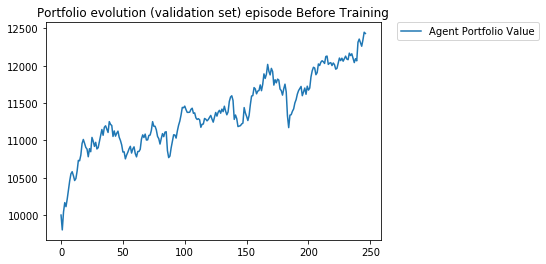

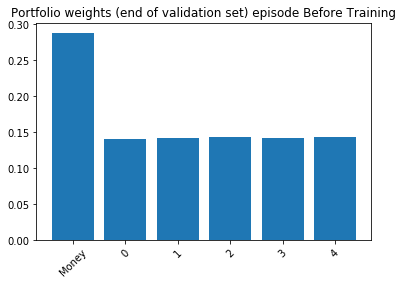

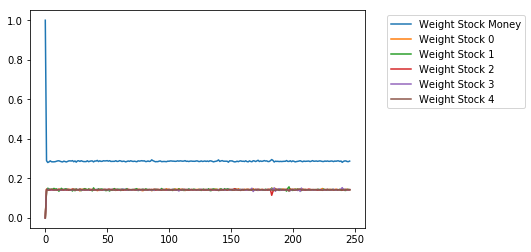

Episode: 0


In [ ]:
actor, state_fu, done_fu = train_rl_algorithm()

# Testing

In [ ]:
from src.test_rl_algorithm import test_rl_algorithm

In [ ]:
p_list, p_list_eq, p_list_fu, p_list_s, w_list = test_rl_algorithm(actor, state_fu, done_fu)

# Analysis

In [ ]:
path = "individual_stocks_5yr/"
times = pd.read_csv(path+"A_data.csv").date
test_start_day =total_steps_train +total_steps_val-int(n/2)+10
times = list(times[test_start_day:])

In [ ]:
#batch_size, learning, ratio_greedy, e, n, kernel1_size, n_batches, ratio_regul

data_type = path_data.split('/')[2][5:].split('.')[0]
namesBio=['JNJ','PFE','AMGN','MDT','CELG','LLY']
namesUtilities=['XOM','CVX','MRK','SLB','MMM']
namesTech=['FB','AMZN','MSFT','AAPL','T','VZ','CMCSA','IBM','CRM','INTC']


if data_type == 'Utilities':
    list_stock = namesUtilities
elif data_type == 'Bio':
    list_stock = namesBio
elif data_type == 'Tech':
    list_stock = namesTech
else:
    list_stock = [i for i in range(m)]


plt.title('Portfolio Value (Test Set) {}: {}, {}, {}, {}, {}, {}, {}, {}'.format(data_type, batch_size, learning, ratio_greedy, n_episodes, n, kernel1_size, n_batches, ratio_regul))
plt.plot(p_list, label = 'Agent Portfolio Value')
plt.plot(p_list_eq, label = 'Equi-weighted Portfolio Value')
plt.plot(p_list_s, label = 'Secured Portfolio Value')
for i in range(m):
    plt.plot(p_list_fu[i], label = 'Full Stock {} Portfolio Value'.format(list_stock[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
names = ['Money'] + list_stock
w_list = np.array(w_list)
for j in range(m+1):
    plt.plot(w_list[:,j], label = 'Weight Stock {}'.format(names[j]))
    plt.title('Weight evolution during testing')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.show()

In [ ]:
plt.plot(np.array(p_list)-np.array(p_list_eq))

In [ ]:
index1=0
index2=-1

plt.plot(list_final_pf[index1:index2], label = 'Agent Portfolio Value')
plt.plot(list_final_pf_eq[index1:index2], label = 'Baseline Portfolio Value')
plt.plot(list_final_pf_s[index1:index2], label = 'Secured Portfolio Value')
plt.legend()
plt.show()

In [ ]:
plt.plot((np.array(list_final_pf)-np.array(list_final_pf_eq)))